In [20]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-08-15 02:57:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 108.177.12.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-08-15 02:57:21 (129 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [21]:
import numpy as np
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

sentences = []
labels = []
    # YOUR CODE HERE
with open('/tmp/sarcasm.json', 'r') as f:
      data = json.load(f)

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

train_sentences = sentences[:training_size]
valid_sentences = sentences[training_size:]
train_labels = labels[:training_size]
valid_labels = labels[training_size:]

token = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
token.fit_on_texts(sentences)
word_index = token.word_index

train_sequences = token.texts_to_sequences(train_sentences)
valid_sequences = token.texts_to_sequences(valid_sentences)

train_padded = pad_sequences(train_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)
valid_padded = pad_sequences(valid_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)
train_labels = np.asarray(train_labels)
valid_labels = np.asarray(valid_labels)

In [22]:
 model = tf.keras.Sequential([
    # YOUR CODE HERE. KEEP THIS OUTPUT LAYER INTACT OR TESTS MAY FAIL
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        #tf.keras.layers.Conv1D(128, 5, activation='relu'),
        #tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
 
 def on_epoch_end(self, epoch, logs={}):
	if(logs.get("accuracy")>0.91):
		print("\nReached 60% accuracy so cancelling training!")
		self.model.stop_training = True

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_padded, train_labels,
                        validation_data=(valid_padded, valid_labels),
                        epochs=100,
                        verbose=1)


Epoch 1/100
625/625 [==============================] - 107s 172ms/step - loss: 0.4445 - accuracy: 0.7776 - val_loss: 0.3806 - val_accuracy: 0.8229
Epoch 2/100
625/625 [==============================] - 105s 168ms/step - loss: 0.3481 - accuracy: 0.8417 - val_loss: 0.3815 - val_accuracy: 0.8247
Epoch 3/100
625/625 [==============================] - 111s 177ms/step - loss: 0.3257 - accuracy: 0.8533 - val_loss: 0.3944 - val_accuracy: 0.8170
Epoch 4/100
625/625 [==============================] - 106s 170ms/step - loss: 0.3096 - accuracy: 0.8632 - val_loss: 0.3766 - val_accuracy: 0.8247
Epoch 5/100
625/625 [==============================] - 106s 170ms/step - loss: 0.3003 - accuracy: 0.8671 - val_loss: 0.3728 - val_accuracy: 0.8344
Epoch 6/100
625/625 [==============================] - 106s 169ms/step - loss: 0.2892 - accuracy: 0.8739 - val_loss: 0.3738 - val_accuracy: 0.8343
Epoch 7/100
563/625 [==========================>...] - ETA: 9s - loss: 0.2780 - accuracy: 0.8792

In [ ]:
#Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, 
                                padding=padding_type, 
                                truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                               maxlen=max_length, 
                               padding=padding_type, 
                               truncating=trunc_type)

# Sarcasm with Bidirectional LSTM

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim, 
                              input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np
num_epochs = 10
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/10
625/625 [==============================] - 35s 57ms/step - loss: 0.4500 - accuracy: 0.7764 - val_loss: 0.3902 - val_accuracy: 0.8219
Epoch 2/10
625/625 [==============================] - 34s 54ms/step - loss: 0.3568 - accuracy: 0.8359 - val_loss: 0.3802 - val_accuracy: 0.8264
Epoch 3/10
625/625 [==============================] - 34s 55ms/step - loss: 0.3360 - accuracy: 0.8468 - val_loss: 0.3736 - val_accuracy: 0.8329
Epoch 4/10
625/625 [==============================] - 34s 55ms/step - loss: 0.3135 - accuracy: 0.8594 - val_loss: 0.3727 - val_accuracy: 0.8322
Epoch 5/10
625/625 [==============================] - 35s 56ms/step - loss: 0.2969 - accuracy: 0.8685 - val_loss: 0.3768 - val_accuracy: 0.8301
Epoch 6/10
625/625 [==============================] - 35s 55ms/step - loss: 0.2859 - accuracy: 0.8741 - val_loss: 0.3865 - val_accuracy: 0.8316
Epoch 7/10
625/625 [==============================] - 35s 57ms/step - loss: 0.2793 - accuracy: 0.8780 - val_loss: 0.3814 - val_accuracy:

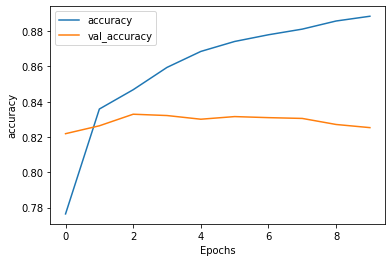

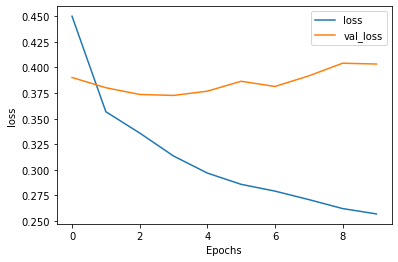

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' +string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
model.save("C3W3-4-Sarcasm_with_Bidirectional_LSTM.h5")

# Sarcasm with 1D Convolutional Layer

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 8s 12ms/step - loss: 0.4802 - accuracy: 0.7559 - val_loss: 0.4

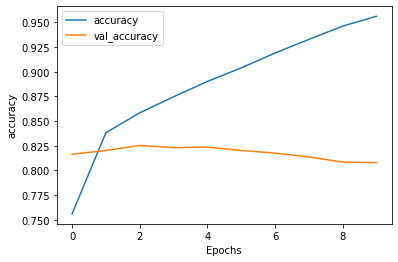

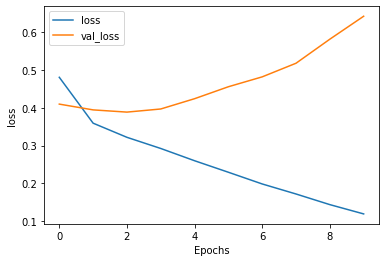

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("C3W3-5-Sarcasm_with_1D_Convolutional_Layer.h5")
